<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/4_12_ESAA_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. LightGBM

: XGBoost와 예측성능엔 큰 차이가 없으며 학습에 걸리는 시간이 훨씬 짧다는 장점

BUT 과적합이 발생하기 쉽다는 단점

: 일반 GBM 계열의 트리분할방법과 다르게 리프 중심 트리분할(leaf wise)방식을 사용

## [Light GBM 하이퍼 파라미터]

1. num_iterations[default=100] : 반복수행하려는 트리개수 지정

2. learning_rate [default=0.1] : 0에서 1사이 값을 지정하며 부스팅 스텝을 반복적ㅇ로 수행할 때 업데이터 되는 학습률 값

3. max_depth

4. min_data_in_leaf

##[하이퍼 파라미터 튜닝방안]

num_leaves 의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝방안

## light GBM 적용 - 위스콘신 유방암 예측

In [1]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # roc_auc 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test,preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870,     F1 : 0.9682, AUC:0.9905


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

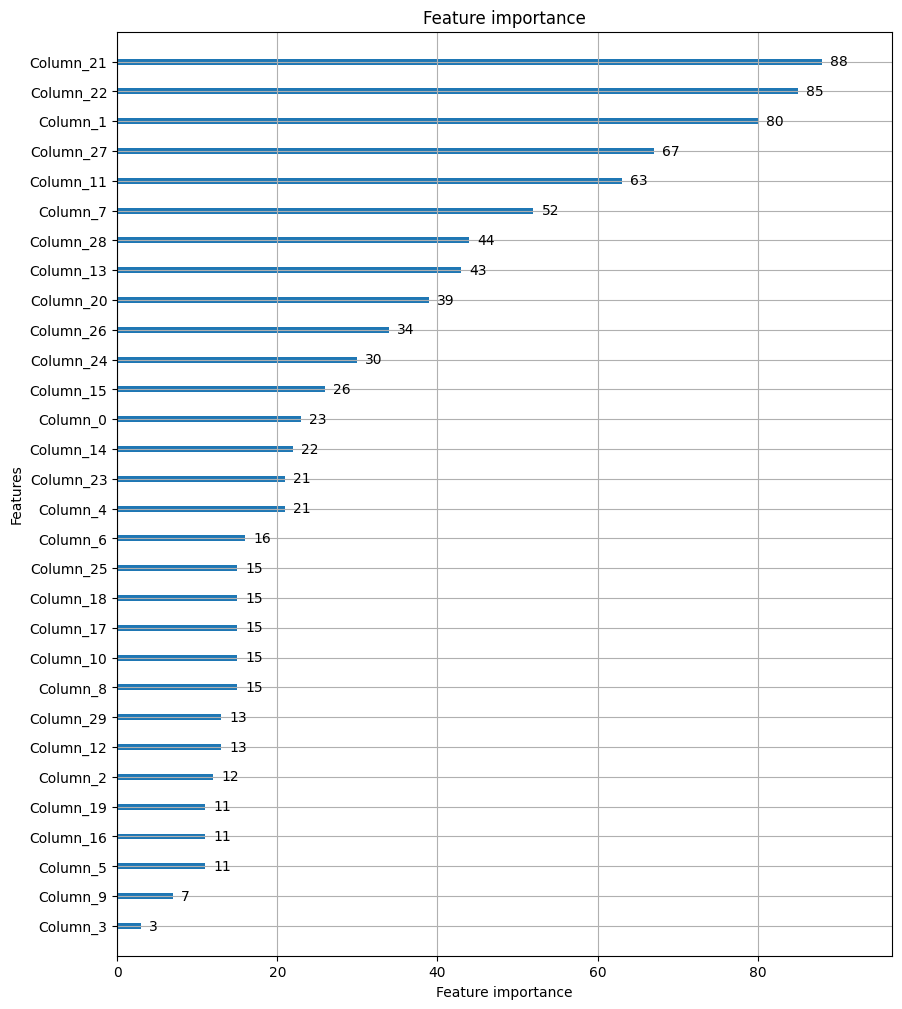

In [5]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

# 8. 분류실습 = 캐글 산탄데르 고객 만족 예측

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from google.colab import drive
drive.mount('/content/drive')

cust_df = pd.read_csv("/content/drive/MyDrive/train.csv",encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [13]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [14]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.039569


In [15]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [16]:
cust_df['var3'].replace(-9999999,2,inplace=True)
cust_df.drop('ID', axis=1)


X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 370)


In [17]:
#비대칭한 데이터 세트이기에 학습 데이터가 테스트 데이터 세트에 비슷하게 추출되었는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 370), 테스트 세트 shape: (15204, 370)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimator는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state = 156)

#성능 평가 지표를  auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83791	validation_1-auc:0.82536
[1]	validation_0-auc:0.84304	validation_1-auc:0.82870
[2]	validation_0-auc:0.84952	validation_1-auc:0.83288
[3]	validation_0-auc:0.85566	validation_1-auc:0.83734
[4]	validation_0-auc:0.85967	validation_1-auc:0.83828
[5]	validation_0-auc:0.86189	validation_1-auc:0.83998
[6]	validation_0-auc:0.86595	validation_1-auc:0.84012
[7]	validation_0-auc:0.87046	validation_1-auc:0.83823
[8]	validation_0-auc:0.87319	validation_1-auc:0.83976
[9]	validation_0-auc:0.87596	validation_1-auc:0.83883
[10]	validation_0-auc:0.87823	validation_1-auc:0.83752
[11]	validation_0-auc:0.88006	validation_1-auc:0.83809
[12]	validation_0-auc:0.88204	validation_1-auc:0.83879
[13]	validation_0-auc:0.88405	validation_1-auc:0.83809
[14]	validation_0-auc:0.88508	validation_1-auc:0.83802
[15]	validation_0-auc:0.88683	validation_1-auc:0.83833
[16]	validation_0-auc:0.88841	validation_1-auc:0.83811
[17]	validation_0-auc:0.89068	validation_1-auc:0.83777
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

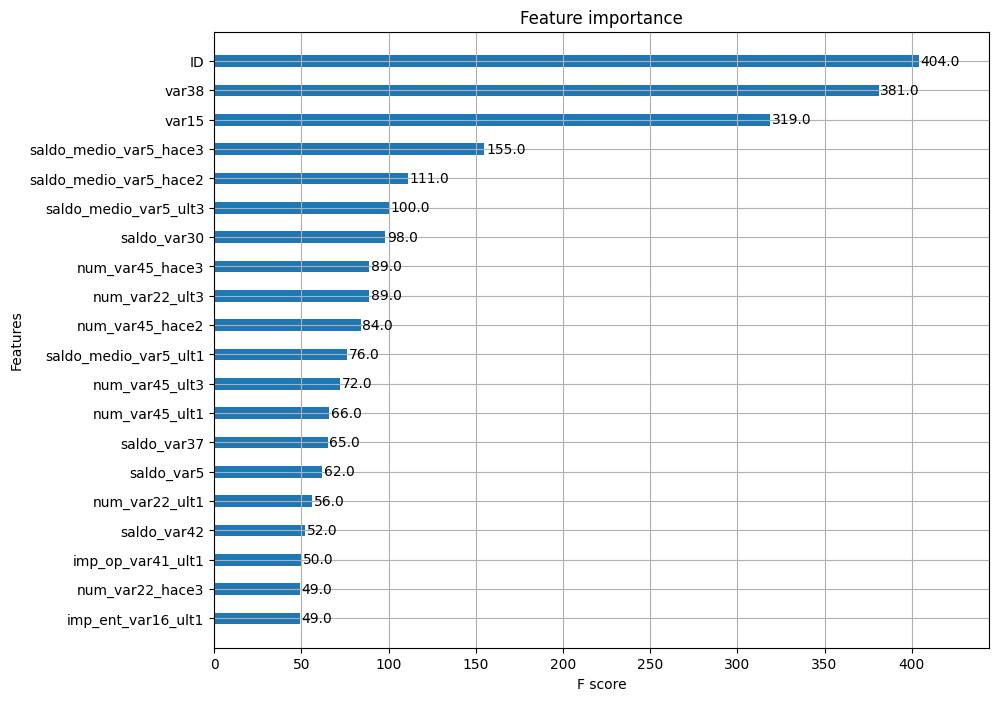

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set = evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817877	valid_0's binary_logloss: 0.165052
[2]	valid_0's auc: 0.817879	valid_0's binary_logloss: 0.160075
[3]	valid_0's auc: 0.82723	valid_0's binary_logloss: 0.156418
[4]	valid_0's auc: 0.831084	valid_0's binary_logloss: 0.153598
[5]	valid_0's auc: 0.833542	valid_0's binary_logloss: 0.151396
[6]	valid_0's auc: 0.833045	valid_0's binary_logloss: 0.149583
[7]	valid_0's auc: 0.834596	valid_0's binary_logloss: 0.148134
[8]	valid_0's auc: 0.836232	valid_0's binary_logloss: 0.146835
[9]	valid_0's auc: 0.837247	valid_0's binary_logloss: 0.145888
[10]	valid_0's auc: 0.838312	valid_0's binary_logloss: 0.144884
[11]	valid_0's auc: 0.839099	valid_0's binary_logloss: 0.144052
[12]	valid_0's auc: 0.83924	valid_0's binary_logloss: 0.143418
[13]	valid_0's auc: 0.83934	valid_0's binary_logloss: 0.142902
[14]	valid_0's auc: 0.839012	valid_0's binary_logloss: 0.142465
[15]	valid_0's auc: 0.839228	valid_0's binary_logloss: 0.142037
[16]	valid_0's auc: 0.838888	valid_0's binary_loglos

In [22]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상 시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)


params = {'num_leaves' : [32,64],
          'max_depth' : [1218,160],
          'min_child_samples': [60,100],
          'subsample'  : [0.8,1]
}

#cv는 3으로 가정
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train,y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC :{0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.823615	training's binary_logloss: 0.15611	valid_1's auc: 0.816534	valid_1's binary_logloss: 0.165167
[2]	training's auc: 0.827395	training's binary_logloss: 0.150861	valid_1's auc: 0.818857	valid_1's binary_logloss: 0.160028
[3]	training's auc: 0.837502	training's binary_logloss: 0.146944	valid_1's auc: 0.827871	valid_1's binary_logloss: 0.156373
[4]	training's auc: 0.842242	training's binary_logloss: 0.143899	valid_1's auc: 0.831686	valid_1's binary_logloss: 0.153464
[5]	training's auc: 0.845206	training's binary_logloss: 0.141426	valid_1's auc: 0.833607	valid_1's binary_logloss: 0.151299
[6]	training's auc: 0.847918	training's binary_logloss: 0.139351	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.149438
[7]	training's auc: 0.851906	training's binary_logloss: 0.137568	valid_1's auc: 0.838369	valid_1's binary_logloss: 0.147868
[8]	training's auc: 0.853508	training's binary_logloss: 0.136068	valid_1's auc: 0.838935	valid_1's binary_logloss: 0.146593
[9]	train